# DRILL: Dimensionality Reduction in Linear Regression -- Kristofer Schobert

Here we are playing with some data we generate to further understand how partial least squares regression (PLSR) works. 

In [1]:
import math
import warnings

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.cross_decomposition import PLSRegression

%matplotlib inline
sns.set_style('white')

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)




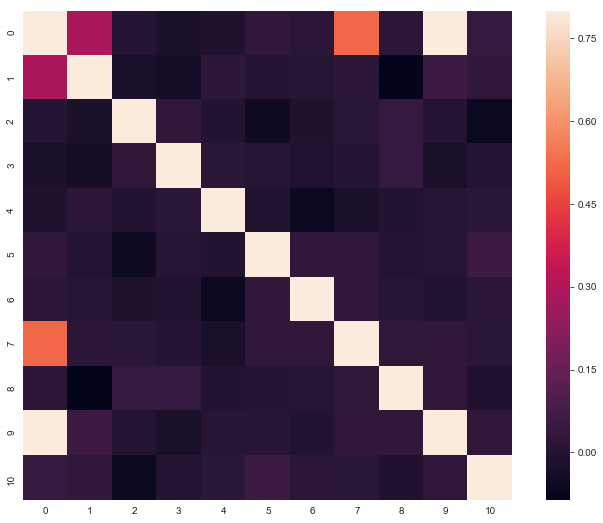

In [40]:

# Number of datapoints in outcome.
n = 1000

# Number of features.
p = 10

# Create random normally distributed data for parameters.
X = np.random.normal(size=n * p).reshape((n, p))

# Create normally distributed outcome related to parameters but with noise.
y = X[:, 0] + 2 * X[:, 6] + 3.2 * X[:, 8] +np.random.normal(size=n * 1) + 5



# Check out correlations. First column is the outcome.
f, ax = plt.subplots(figsize=(12, 9))
corrmat = pd.DataFrame(np.insert(X, 0, y, axis=1)).corr()

# Draw the heatmap using seaborn.
sns.set_style('white')
sns.heatmap(corrmat, vmax=.8, square=True)
sns.set_style('white')
plt.show()

R-squared regression: 0.9428471208301823
R-squared PLSR: 0.93871974410859


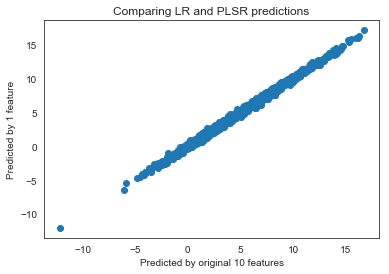

In [46]:
# Fit a linear model with all 10 features.
regr = linear_model.LinearRegression()
regr.fit(X, y)

# Save predicted values.
Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y))

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls1 = PLSRegression(n_components=1)

# Reduce X to R(X) and regress on y.
pls1.fit(X, y)

# Save predicted values.
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, y))

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 1 feature')
plt.title('Comparing LR and PLSR predictions')
plt.show()

With only one component used, PLSR works fairly well with the data we have generated. This is seen in the R^2 value for PLSR. We are comparing this to the R^2 value obtained with a standard linear regression, where there is one compontent for every feature. 

We compare the output of the standard linear regression and the PLSR in the plot. The variance in this line is due to the fact the PLSR cannot capture all the variance in our outcome variable with only 1 component. The standard linear regression can capture most all of it, however, since it is using 10 components (one for every feature). 

This data is fairly linear, so we expect our linear model to work well even though only one component is used. Lets try three components.

R-squared regression: 0.9428471208301823
R-squared PLSR: 0.9428470082434872


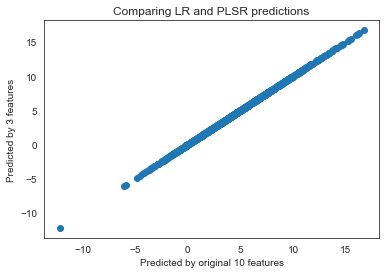

In [50]:
# Fit a linear model with all 10 features.
regr = linear_model.LinearRegression()
regr.fit(X, y)

# Save predicted values.
Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y))

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls1 = PLSRegression(n_components=3)
# Reduce X to R(X) and regress on y.
pls1.fit(X, y)

# Save predicted values.
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, y))

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

Now with three components our PLSR's R^2 value is approximately equal to our regression's R^2 value. It seems three components is what it takes to as accurate as a standard regression in the case of our dataset. This is, of course, due to the fact that our outcome variable is y = x_0 + 2x_6 + 3.2x_8 + (random noise). It involves 3 of input dataset's dimensions.

Also, our plot comparing our linear regression and PLSR has much less variation. This is what we would expect from two models that are so similar. 

Maybe only two dimension were needed. If we had the equation y = x_0 + x_1, PLSR would only need 1 dimension. The one that lies along the line x_0 = x_1

R-squared regression: 0.9428471208301823
R-squared PLSR: 0.942791452463289


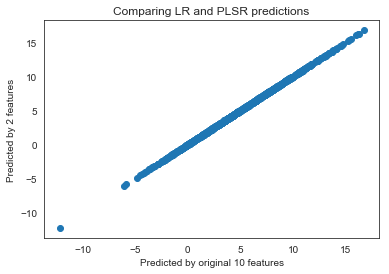

In [51]:
# Fit a linear model with all 10 features.
regr = linear_model.LinearRegression()
regr.fit(X, y)

# Save predicted values.
Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y))

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 2 dimensions.
pls1 = PLSRegression(n_components=2)
# Reduce X to R(X) and regress on y.
pls1.fit(X, y)

# Save predicted values.
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, y))

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 2 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

Upon comparing this PLSR's R^2 value to the regression's value, this 2-component PLSR did not perform quite as well as our 3-component. It still performed increadably well though. It only disagrees with the regression's R^2 value in the fourth decimal place.